In [1]:
def function1(input):
    return input + " from function1"

In [2]:
def function2(input):
    return input + " from function2"

In [3]:
def function3(input):
    return input + " from function3"

In [4]:
from langgraph.graph import Graph

In [5]:
workflow = Graph()

In [6]:
workflow.add_node("fun1", function1)
workflow.add_node("fun2", function2)

workflow.add_edge("fun1", "fun2")
workflow.set_entry_point("fun1")
workflow.set_finish_point("fun2")

graph = workflow.compile()

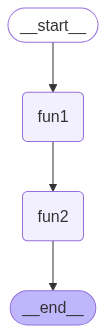

In [7]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke("hi")

'hi from function1 from function2'

In [9]:
for events in graph.stream("hi this is sam"):
    for key, val in events.items():
        print(f"Node: {key}")
        print(val)
        print("-------")

Node: fun1
hi this is sam from function1
-------
Node: fun2
hi this is sam from function1 from function2
-------


In [10]:
from langchain_groq.chat_models import ChatGroq
from dotenv import load_dotenv
import os

load_dotenv()

True

In [11]:
groq_api_key = os.getenv('GROQ_API_KEY')

model = ChatGroq(groq_api_key=groq_api_key, model="gemma2-9b-it")

In [12]:
model.invoke("hi").content

'Hello! 👋\n\nHow can I help you today? 😊\n'

In [13]:
def llm(input):
    return model.invoke(input).content

In [14]:
def token_counter(input):
    tokens = input.split()
    print(tokens)
    return f"Total token number in the generated answer {len(tokens)}"

In [15]:
workflow2 = Graph()

workflow2.add_node("My_LLM", llm)
workflow2.add_node("LLM_Output_Token_Counter", token_counter)

workflow2.add_edge("My_LLM", "LLM_Output_Token_Counter")

workflow2.set_entry_point("My_LLM")
workflow2.set_finish_point("LLM_Output_Token_Counter")

app2 = workflow2.compile()

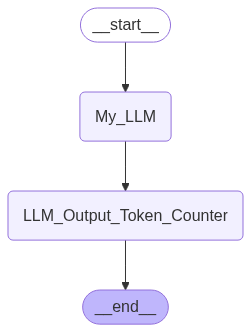

In [16]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [19]:
app2.invoke("can you tell me about the india's capital?")

["India's", 'capital', 'is', '**New', 'Delhi**.', "Here's", 'some', 'information', 'about', 'it:', '*', '**History:**', 'New', 'Delhi', 'was', 'built', 'in', 'the', 'early', '20th', 'century', 'as', 'the', 'new', 'capital', 'of', 'British', 'India,', 'replacing', 'Calcutta.', 'It', 'was', 'officially', 'inaugurated', 'in', '1931.', '*', '**Location:**', "It's", 'located', 'in', 'northern', 'India,', 'on', 'the', 'banks', 'of', 'the', 'Yamuna', 'River.', '*', '**Governance:**', 'New', 'Delhi', 'is', 'a', '**Union', 'Territory**,', 'directly', 'governed', 'by', 'the', 'central', 'government', 'of', 'India.', '*', '**Population:**', "It's", 'one', 'of', 'the', 'most', 'populous', 'cities', 'in', 'the', 'world,', 'with', 'over', '30', 'million', 'people', 'living', 'in', 'the', 'National', 'Capital', 'Region.', '*', '**Culture', '&', 'Landmarks:**', 'New', 'Delhi', 'is', 'a', 'vibrant', 'blend', 'of', 'old', 'and', 'new,', 'with', 'historic', 'monuments', 'like', 'the', 'Red', 'Fort,', 'Ja

'Total token number in the generated answer 224'

In [20]:
for events in app2.stream("can you tell more about langgraph"):
    for key, val in events.items():
        print(f"Node: {key}")
        print(val)
        print("---")

Node: My_LLM
Let's talk about LangChain!

**What is LangChain?**

LangChain is an open-source framework designed to simplify the development of applications powered by large language models (LLMs). Think of it as a toolkit that helps you build powerful AI applications, going beyond just simple text generation.

**Key Features and Benefits:**

* **Modular Design:** LangChain is built with modular components, allowing you to easily combine and customize different parts to suit your needs.
* **Chain Creation:** Its core strength lies in "chains," which are sequences of LLMs and other components (like databases, APIs, etc.) that work together to accomplish complex tasks.
* **Memory Management:** LangChain provides mechanisms for LLMs to remember past interactions within a conversation, enabling more natural and context-aware responses.
* **Prompt Engineering:** It offers tools and techniques to craft effective prompts, guiding LLMs to generate the desired output.
* **Data Integration:** La